In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import r2_score;
from sklearn.metrics import mean_squared_error

from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import OLS;
from statsmodels.tsa.stattools import kpss;
from statsmodels.tsa.stattools import acf;
from statsmodels.tsa.stattools import pacf;
from statsmodels.graphics.tsaplots import plot_acf;
from statsmodels.graphics.tsaplots import plot_pacf;
from statsmodels.tsa.arima.model import ARIMA;


import warnings
warnings.filterwarnings('ignore')
data_dir = './data'

In [2]:
data = pd.read_csv(os.path.join(data_dir, 'DAAA.csv'), parse_dates=['observation_date'], index_col='observation_date')
data

,DAAA
observation_date,
1995-01-03,8.53
1995-01-04,8.46
1995-01-05,8.51
1995-01-06,8.45
1995-01-09,8.49
...,...
2025-02-25,5.21
2025-02-26,5.17
2025-02-27,5.21


<Axes: xlabel='observation_date'>

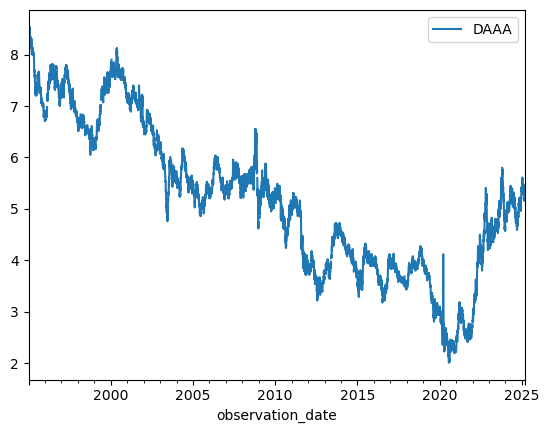

In [3]:
data.plot()

In [4]:
data = data.ffill()
data.isna().sum()

DAAA    0
dtype: int64

In [5]:
t = np.arange(data.shape[0])

n = data.shape[0]
y = data.values.T.ravel()

In [6]:
model = OLS(y,add_constant(t)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 2.046e+04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:27:32   Log-Likelihood:                -9177.1
No. Observations:                7870   AIC:                         1.836e+04
Df Residuals:                    7868   BIC:                         1.837e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3352      0.018    418.955      0.000       7.301       7.370
x1            -0.0006   3.85e-06   -143.048      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      821.405   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1124.300
Skew:                           0.843   Prob(JB):                    7.27e-245
Kurtosis:                       3.764   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

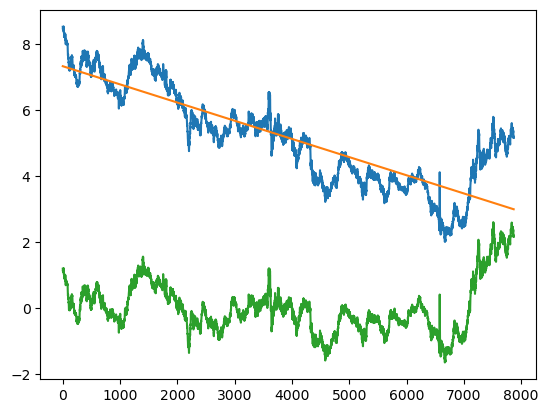

In [7]:
plt.plot(y)
plt.plot(model.predict(add_constant(t)))
plt.plot(y - model.predict(add_constant(t)))
#plt.xlabel()
plt.show()

In [8]:
display(kpss(y,'ct',1))

(30.177107317567113,
 0.01,
 1,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

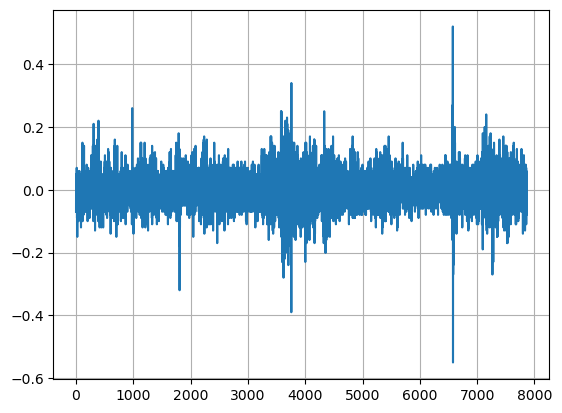

0.029595843295856076

In [9]:
plt.grid()
x_t = y[1:] - y[:-1]
plt.plot(x_t)
plt.show()
display(kpss(x_t,'ct',1)[0])

# 2. Нарисуйте график ACF и PACF

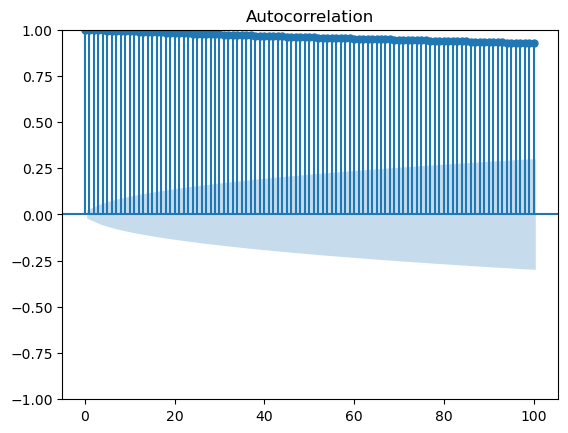

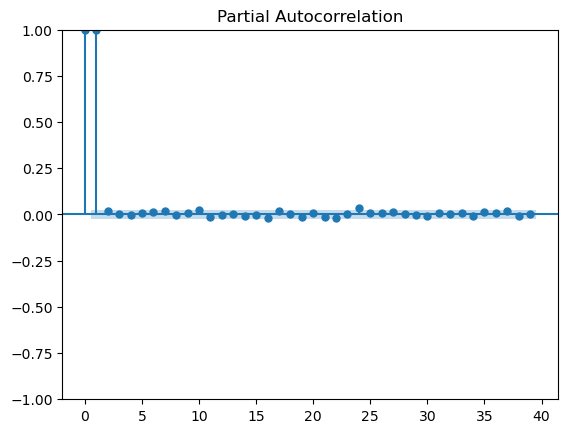

In [10]:
fig = plot_acf(data,use_vlines=True,lags=100)
fig = plot_pacf(data)

# 3. Является ли $ρ(5)$ значимым?

In [11]:
r, conf = acf(data, alpha=0.05)

if conf[5][0] < r[5]<conf[5][1]:
  print('Значим')
  
else:
  print(f'Незначим')

Значим


In [12]:
kpss(data)

(11.467924510039927,
 0.01,
 54,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# 4. Постройте подходящую ARMA модель. 

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.2250525396248118
p-value: 0.1972787867912364


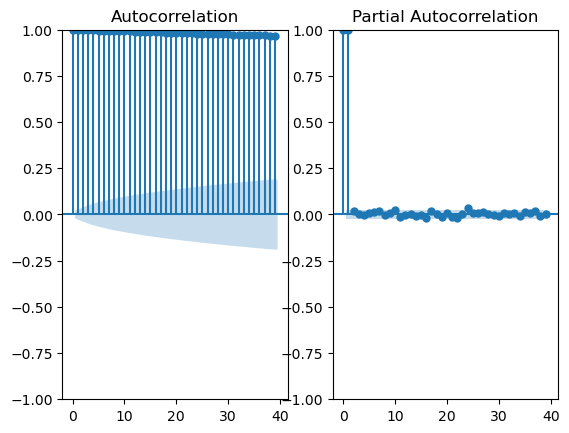

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
plot_acf(data, ax=ax1)
plot_pacf(data, ax=ax2)
plt.show()

In [19]:
from pmdarima import auto_arima

model = auto_arima(
    data,
    start_p=0, max_p=3,
    start_q=1, max_q=3,
    seasonal=True,  # Для ARMA seasonal=False
    trace=True
)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-23847.573, Time=1.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-23846.334, Time=1.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-23847.483, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-23847.824, Time=0.90 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-23846.268, Time=4.61 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 9.782 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7870
Model:               SARIMAX(0, 1, 0)   Log Likelihood               11924.912
Date:                Thu, 06 Mar 2025   AIC                         -23847.824
Time:                        10:30:32   BIC                         -23840.853
Sample:                    01-03-1995   HQIC                        -23845.436
                         - 03-03-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0028   2.26e-05    125.006      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   3.15   Jarque-Bera (JB):             11640.41
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
# Проверка с помощью Ljung-Box теста
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(model.resid(), lags=[10])
print(f'Ljung-Box p-value: {lb_test.iloc[0, 1]}')  # p-value > 0.05 — остатки случайны

Ljung-Box p-value: 0.9844364560965213


# 5. Дайте прогноз на 10 месяцев вперед.

In [30]:
model.predict(int(365/12 * 10))

2025-03-04    5.16
2025-03-05    5.16
2025-03-06    5.16
2025-03-07    5.16
2025-03-10    5.16
              ... 
2026-04-27    5.16
2026-04-28    5.16
2026-04-29    5.16
2026-04-30    5.16
2026-05-01    5.16
Freq: B, Length: 304, dtype: float64